In [ ]:
#aviso: incompatível com jupyterlab 4, versões utilizadas abaixo:

#python       3.12
#astropy      6.0.0
#astroquery   0.4.6
#jupyterlab   3.5.3
#ipympl       0.9.3 <- importante!
#matplotlib   3.8.2
#numpy        1.26.2
#pandas       2.1.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from pandas.plotting import scatter_matrix
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord

# Parte 1: Obtendo dados

In [2]:
#coordenadas do centro da região do céu a ser analisada
coord = SkyCoord('06 08 54 +24 20 00', unit=(u.hourangle, u.deg))

In [3]:
#selecionando o catálogo gaia dr3 e as colunas desejadas
gaia = Vizier(catalog='I/355/gaiadr3', columns=['Source','Dist', 'RA_ICRS', 'DE_ICRS'])
gaia.ROW_LIMIT = 80000

In [4]:
#fazendo o query na coordenada selecionada com raio de 40 minutos de arco
query = gaia.query_region(coord, radius=40*u.arcmin)

In [5]:
#convertendo os dados para um dataframe do pandas
df = query[0].to_pandas()

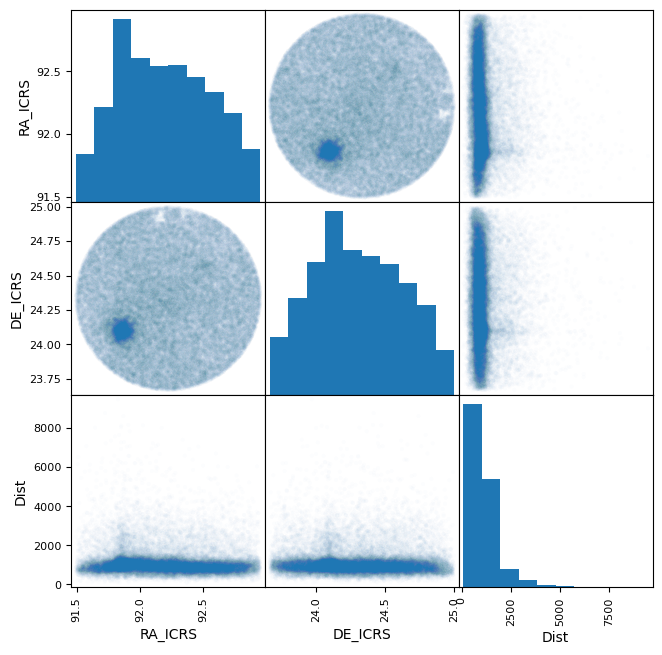

In [6]:
#visualizando os dados obtidos
scatter_matrix(df[['RA_ICRS', 'DE_ICRS', 'Dist']], diagonal='hist', alpha=0.01, figsize=(7.5,7.5))
plt.show()

# Parte 2: Limpeza dos dados

In [7]:
#removendo linhas que não tem dados de distância
df = df.dropna(subset=['Dist'])

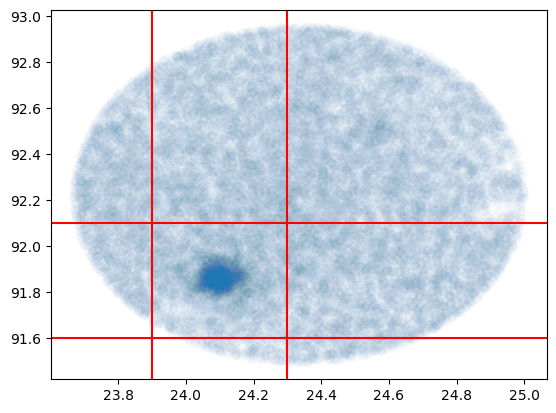

In [8]:
plt.scatter(df['DE_ICRS'], df['RA_ICRS'], alpha=0.01)
plt.axhline(92.1, c='r')
plt.axhline(91.6, c='r')
plt.axvline(23.9, c='r')
plt.axvline(24.3, c='r')
plt.show()

In [9]:
#fazendo o corte da região do céu de modo a centralizar o 
maskRA = (df['RA_ICRS'] > 91.6) * (df['RA_ICRS'] < 92.1)
maskDE = (df['DE_ICRS'] > 23.9) * (df['DE_ICRS'] < 24.3)

df = df[maskRA*maskDE]

In [10]:
df

,Source,Dist,RA_ICRS,DE_ICRS
3881,3425408870090475008,1398.6991,92.087019,23.904246
3924,3425409007529426816,975.7014,92.045344,23.902198
3925,3425409007529427968,1288.0576,92.045968,23.904772
3936,3425409041889164544,863.9178,92.063450,23.900036
3945,3425409076248908160,838.8533,92.078837,23.907849
...,...,...,...,...
46837,3426277552993100416,921.4197,91.790767,24.295687
46844,3426277557291649920,1215.0156,91.794102,24.295443
46847,3426277587352830848,749.8069,91.767876,24.292160
46855,3426277621712579712,912.1376,91.779904,24.297442


# Parte 3: Identificando as estrelas do aglomerado

2489


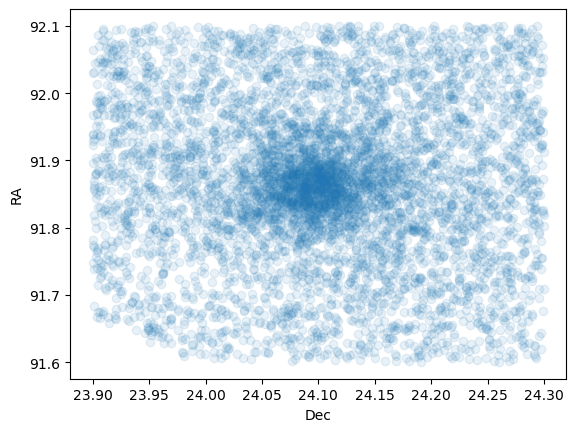

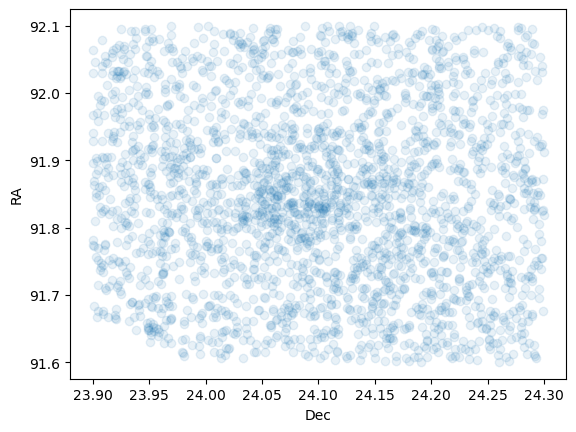

In [11]:
#distancia do aglomerado M35 = ~850pc, logo filtramos por distâncias menores que 1000 inicialmente
maskDist = (df['Dist'] < 1000)
print(maskDist.sum())

plt.scatter(df['DE_ICRS'], df['RA_ICRS'], alpha=0.1)
plt.xlabel('Dec')
plt.ylabel('RA')
plt.show()
plt.scatter(df['DE_ICRS'][maskDist], df['RA_ICRS'][maskDist], alpha=0.1)
plt.xlabel('Dec')
plt.ylabel('RA')
plt.show()

In [ ]:
#dado que o aglomerado "some" para distâncias menores que 1000pc e que há outro aglomerado próximo ao M35
#verificamos as coordenadas nos dados sem corte para verificar qual aglomerado está sendo encontrado

In [12]:
orig = query[0].to_pandas()

In [13]:
#coordenadas do ngc2158
SkyCoord('06 07 26.9 +24 05 56', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    (91.86208333, 24.09888889)>

In [14]:
#coordenadas do M35 (ngc2168)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (92.225, 24.33333333)>

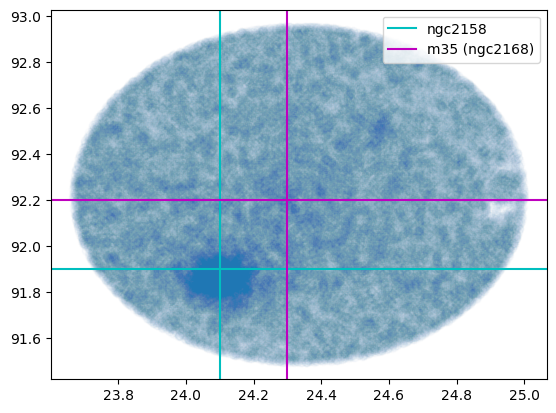

In [15]:
plt.scatter(orig['DE_ICRS'], orig['RA_ICRS'], alpha=0.01)
plt.axvline(24.1, c='c', label='ngc2158')
plt.axhline(91.9, c='c')
plt.axvline(24.3, c='m', label='m35 (ngc2168)')
plt.axhline(92.2, c='m')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#com isso temos que o aglomerado visível é o ngc2158, ao invés do m35 como esperado

In [ ]:
#!conda install ipympl

In [16]:
%matplotlib widget
import ipywidgets as widgets

interactive(children=(IntSlider(value=750, description='mind', max=8000, step=250), IntSlider(value=3500, desc…

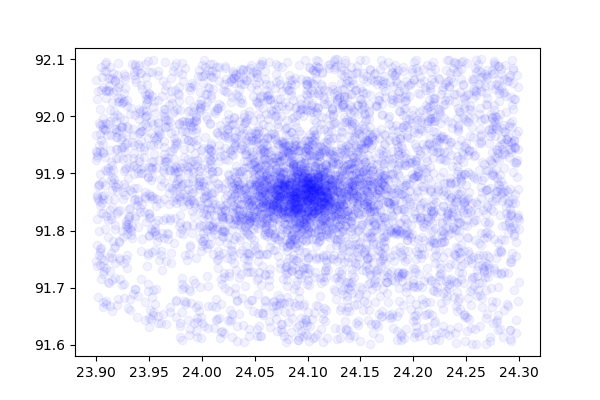

In [29]:
def maskupdate(mind, maxd):
    return (df['Dist'] < maxd) * (df['Dist'] > mind)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim([91.58, 92.12])

@widgets.interact(mind=(0, 8000, 250), maxd=(0, 8000, 250))
def updt(mind=750, maxd=3500):
    ax.cla()
    ax.set_ylim([91.58, 92.12])
    ax.set_xlim([23.88, 24.32])
    ax.scatter(df['DE_ICRS'][maskupdate(mind, maxd)], df['RA_ICRS'][maskupdate(mind, maxd)], alpha=0.05, c='b')

In [ ]:
#distancia do aglomerado ngc2158 = ~3600pc +- 400 pc
#entretanto, temos que o aglomerado aparece no intervalo de 750pc a 3500pc
#junto com muitas estrelas ao redor, fazendo com que eu não consiga identificar
#quais estrelas pertencem ao aglomerado pela distância